In [6]:
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
plt.rcParams['font.family'] = 'SimSun'  # 使用宋体字体作为示例
from numpy import trapz

## 采用多项式进行拟合

E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda3\envs\dataA\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfi

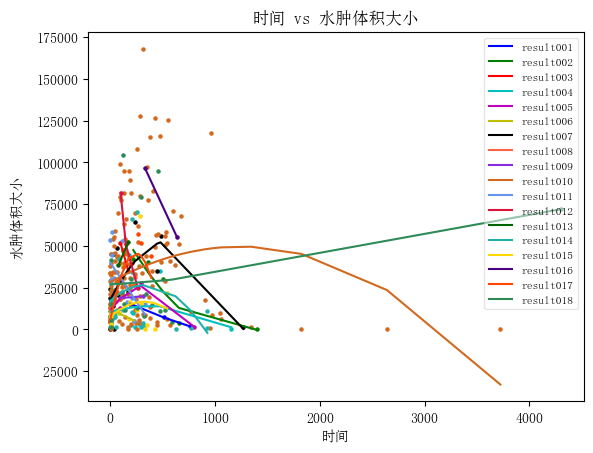

In [7]:
# 读取Excel文件
file_name = '2c数据.xlsx'  # 请替换为您的Excel文件路径

aucs = []  # 保存每个表单的AUC

# 使用openpyxl来获取所有的表单名称
workbook = openpyxl.load_workbook(file_name)
sheet_names = workbook.sheetnames

# 设置颜色列表，为表单准备不同的颜色
colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',
    '#FF6347', '#8A2BE2', '#D2691E', '#6495ED', '#DC143C',
    '#006400', '#20B2AA', '#FFD700', '#4B0082', '#FF4500', '#2E8B57'
]

# 为每个表单绘制图形
for idx, sheet_name in enumerate(sheet_names):
    # 读取表单数据
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    
    # 对数据按时间列进行排序
    df = df.sort_values(by=df.columns[1])  # 假设时间在第二列
    
    # 提取x和y
    x = df.iloc[:, 1].values  # 时间在第二列
    y = df.iloc[:, 2].values  # 水肿体积大小在第三列
    
    # 曲线拟合 (此处为二次曲线拟合)
    p = np.polyfit(x, y, 2)
    y_fit = np.polyval(p, x)
    
    # 绘制图形
    plt.plot(x, y_fit, label=sheet_name, color=colors[idx])
    plt.scatter(x, y, color=colors[idx], marker='o', s=5)  # 散点大小为5
    auc = trapz(y_fit, x)
    aucs.append(auc)

# 显示图例
plt.legend(loc='upper right', framealpha=0.5, fontsize='small')  # framealpha设置背景透明度，0完全透明，1完全不透明


# 设置标题和标签
plt.title("时间 vs 水肿体积大小")
plt.xlabel("时间")
plt.ylabel("水肿体积大小")

# 显示图形
plt.show()


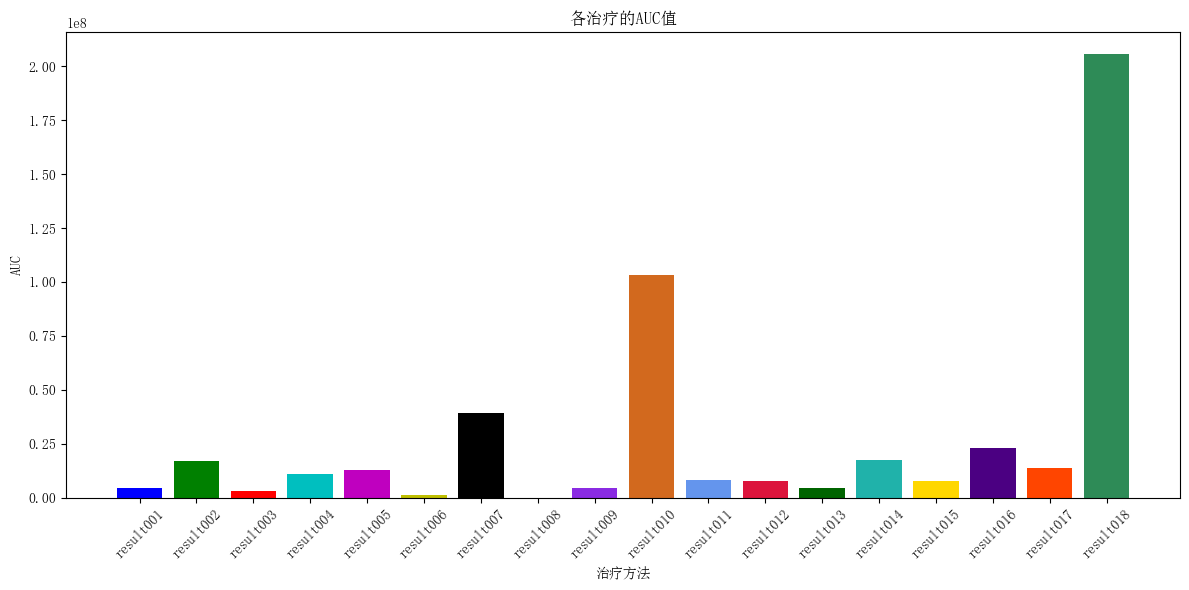

In [8]:
# 绘制AUC的柱状图
plt.figure(figsize=(12, 6))  # 设置图形大小
plt.bar(sheet_names, aucs, color=colors[:len(sheet_names)])  # 使用前len(sheet_names)个颜色
plt.xticks(rotation=45)  # 旋转x轴标签以便于阅读
plt.xlabel("治疗方法")
plt.ylabel("AUC")
plt.title("各治疗的AUC值")
plt.tight_layout()  # 优化布局
plt.show()

AUC（Area Under Curve）通常在统计学和机器学习中用于描述ROC曲线下的面积，用于衡量分类器的性能。但在这个上下文中，AUC被用来衡量时间与水肿体积之间的曲线下的面积。对于此应用，以下是AUC可以告诉我们的内容：

1. 水肿体积的累计效应：AUC表示在整个时间范围内，水肿体积的累计效应或总变化。较大的AUC意味着水肿体积在整个考察期内相对较大，而较小的AUC意味着水肿体积相对较小。

2. 治疗效果的比较：通过比较不同治疗方法的AUC，您可以得知哪种治疗方法对水肿体积产生了更大或更小的影响。

3. 趋势分析：由于您采用了二次曲线拟合，这意味着对于每种治疗，您都分析了水肿体积随时间的趋势。AUC能够为您提供一个量化的指标，告诉您这个趋势在整个时间范围内的总体效应是怎样的。

4. 治疗的持续性：如果两种治疗的曲线有相似的形状但AUC不同，这可能意味着一种治疗在整个时间范围内的效果更为持续。

可以看到，result18对应的AUC值最大，说明
1. 更大的水肿体积累计效应：AUC值代表在整个时间范围内水肿体积的累计效应。第十八种治疗方法的高AUC值可能表示在该治疗下，患者的水肿体积在整个考察期内累积较多。

2. 相对较差的治疗效果：如果高的水肿体积被视为不良的结果（例如，更多的水肿可能意味着疾病更为严重或不受控制），那么第十八种治疗方法的高AUC值可能暗示其相对效果较差。

3. 治疗的持续性：如果第十八种治疗方法的AUC值明显高于其他治疗方法，这可能意味着其在整个时间范围内的效果更为持续，但这种效果可能是不良的，导致水肿体积持续增加。

In [1]:
import pandas as pd

# 加载.xlsx文件
file_path = "2c数据.xlsx"
xls = pd.ExcelFile(file_path)

# 创建一个空的DataFrame来存储所有的数据
all_data = pd.DataFrame()

# 循环读取每一个表单并添加到all_data中
for sheet_name in xls.sheet_names:
    sheet_data = pd.read_excel(xls, sheet_name=sheet_name, header=None, names=['patient_id', 'time', 'edema_volume'])
    sheet_data['treatment'] = sheet_name  # 添加一个新列来标识治疗方法
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

In [2]:
# 按治疗方法分组，然后计算平均值和标准偏差
grouped = all_data.groupby('treatment')['edema_volume'].agg(['mean', 'std'])

print(grouped)


                   mean           std
treatment                            
result001   8437.750000   5605.479365
result002  26498.833333  19435.313503
result003  33718.000000  18795.560673
result004  11566.818182  12166.963438
result005  19890.000000  16012.635910
result006  12311.666667   8826.162492
result007  26041.250000  19359.949058
result008  21691.500000  13294.314593
result009  17098.666667   3715.429630
result010  33489.751381  30922.294099
result011  29350.083333  18672.490701
result012  63709.250000  32413.046102
result013  30568.000000  26496.750291
result014  17830.055556  21990.626697
result015  12154.312500  16028.356895
result016  52524.333333  45435.683403
result017  34125.375000  18753.289532
result018  29703.950000  31532.408263


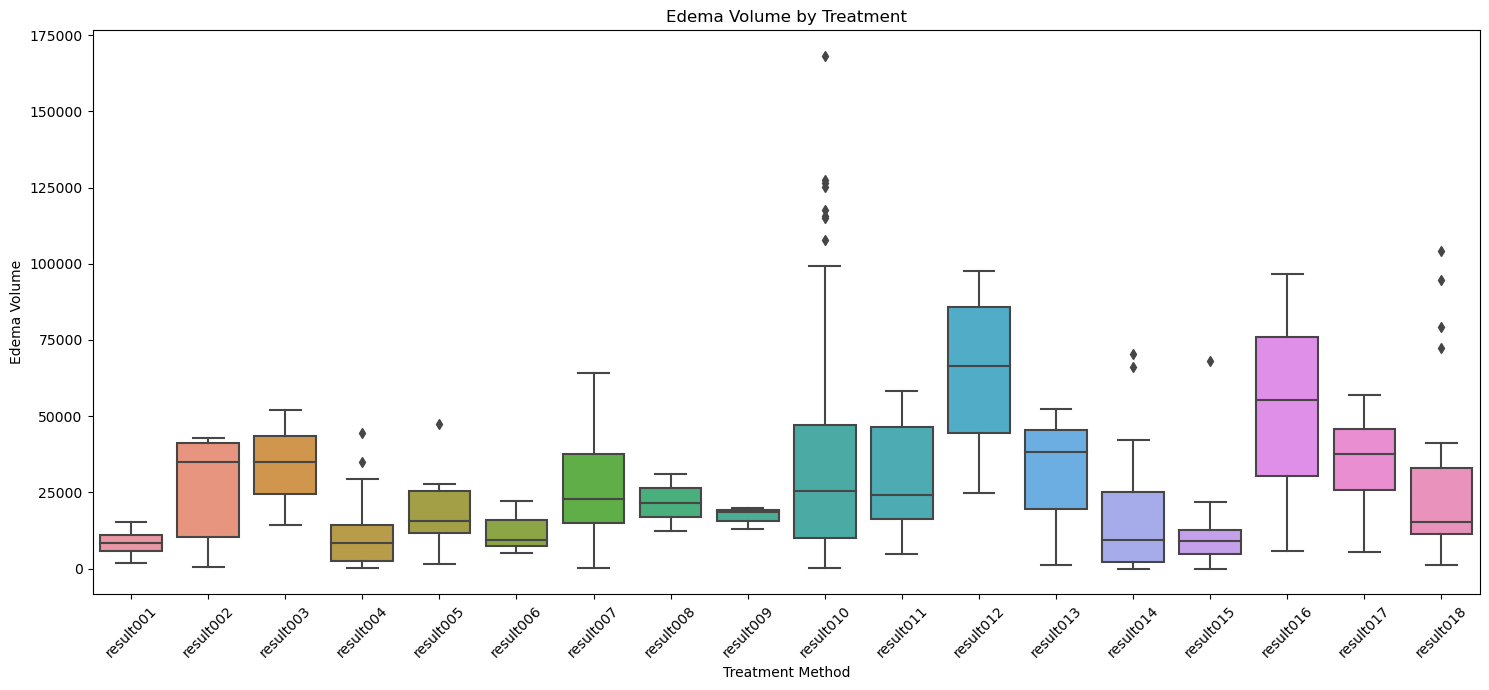

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制箱型图
plt.figure(figsize=(15, 7))
sns.boxplot(data=all_data, x='treatment', y='edema_volume')
plt.title('Edema Volume by Treatment')
plt.ylabel('Edema Volume')
plt.xlabel('Treatment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 方差分析
model = ols('edema_volume ~ treatment', data=all_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F    PR(>F)
treatment  2.762112e+10   17.0  2.193315  0.004508
Residual   2.311244e+11  312.0       NaN       NaN


1. 中位数：每个箱子的中线表示该组数据的中位数。通过比较不同治疗方法的中位数，我们可以判断哪种治疗方法在中位数上对水肿体积有更好或更差的效果。

2. 数据的分布：箱子的上下边界分别表示第三四分位数和第一四分位数。箱子的高度（即IQR, interquartile range）可以告诉我们数据的分散情况。更高的箱子表示数据更分散，而较低的箱子则表示数据集中。

3. 异常值：箱型图上方和下方可能存在一些点，这些点表示异常值。如果某种治疗方法的箱型图显示有很多异常值，这可能意味着该治疗方法的效果不稳定，或者数据收集存在问题。

4. 数据的偏态：如果箱子不是对称的，那么数据可能是偏态的。例如，如果箱子的上部比下部长，那么数据可能是正偏的。

5. 数据的范围："触须"或"胡须"表示数据的总体范围（除去一些异常值）。这可以帮助我们了解水肿体积在各种治疗方法下的变化范围。

5. 治疗效果的比较：您可以直观地比较不同治疗方法的箱型图，看看哪种治疗方法的水肿体积中位数较低、哪种方法的数据范围更广泛、哪种方法有更多的异常值等。